In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
books_df = pd.read_csv('books.csv')
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [16]:
df.isnull().sum()

book_id                       0
goodreads_book_id             0
best_book_id                  0
work_id                       0
books_count                   0
isbn                         11
isbn13                       10
authors                       0
original_publication_year     0
original_title               36
title                         0
language_code                43
average_rating                0
ratings_count                 0
work_ratings_count            0
work_text_reviews_count       0
ratings_1                     0
ratings_2                     0
ratings_3                     0
ratings_4                     0
ratings_5                     0
image_url                     0
small_image_url               0
NonEnglish                    0
dtype: int64

# Question 1 :  How many rows and columns are there in books.csv dataset?

In [6]:
num_rows, num_columns = books_df.shape
print(f"Q1: The dataset has {num_rows} rows and {num_columns} columns.")

Q1: The dataset has 399 rows and 24 columns.


# Question 2: How many books do not have an original title?

In [7]:
books_without_original_title = books_df['original_title'].isnull().sum()
print(f"Q2: There are {books_without_original_title} books without an original title.")

Q2: There are 36 books without an original title.


# Question 3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [8]:
unique_books = books_df['book_id'].nunique()
print(f"Q3: There are {unique_books} unique books in the dataset after removing null values in the original_title column.")

Q3: There are 399 unique books in the dataset after removing null values in the original_title column.


# Question 4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [9]:
average_rating = books_df['average_rating'].mean()
print(f"Q4: The average rating of all the books is {average_rating:.2f}.")

Q4: The average rating of all the books is 3.98.


# Question 5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [10]:
books_published_in_2000 = books_df[books_df['original_publication_year'] == 2000].shape[0]
print(f"Q5: The number of books published in the year 2000 is {books_published_in_2000}.")

Q5: The number of books published in the year 2000 is 8.


# Question 6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [11]:
max_ratings_book_title = books_df.loc[books_df['work_ratings_count'].idxmax(), 'title']
print(f"Q6: The book with the maximum number of ratings is '{max_ratings_book_title}'.")

Q6: The book with the maximum number of ratings is 'The Diary of a Young Girl'.


# Question 7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

In [12]:
rating_buckets = np.arange(0, 5.5, 0.5)
books_df['rating_bucket'] = pd.cut(books_df['average_rating'], bins=rating_buckets, include_lowest=True)
bucket_counts = books_df['rating_bucket'].value_counts().sort_index()

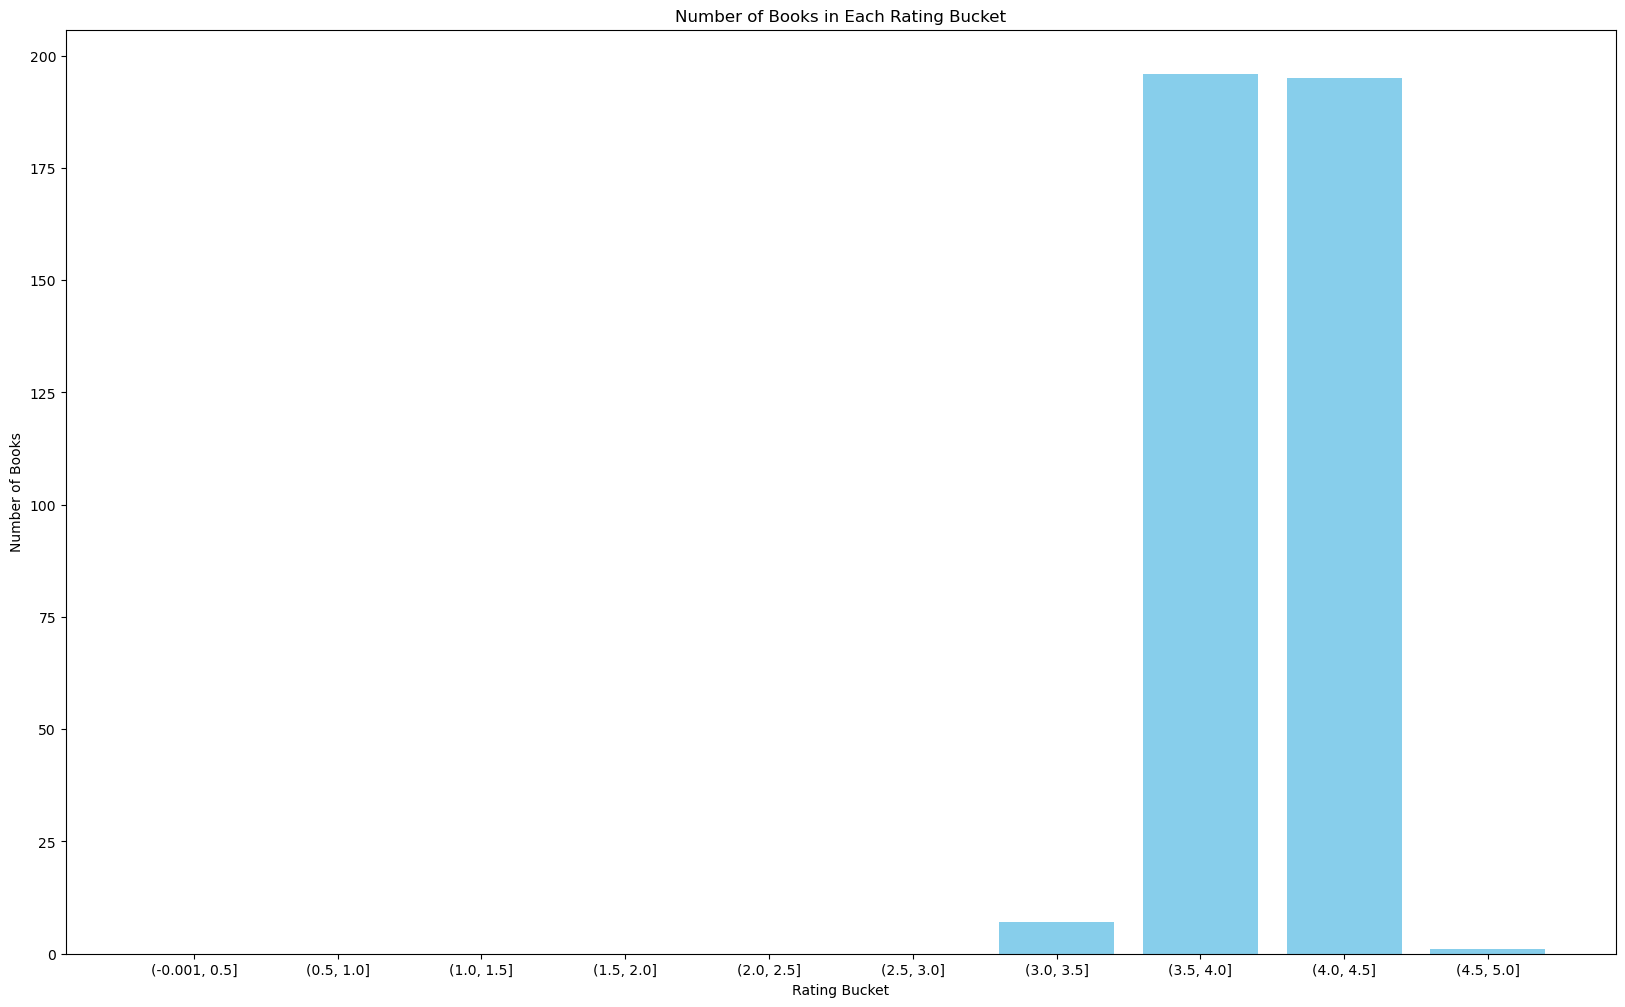

In [14]:
plt.figure(figsize=(20,12))
plt.bar(bucket_counts.index.astype(str), bucket_counts.values, color='skyblue')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()

# Additional Analysis

## Count of books in each language_code.

In [17]:
language_counts = books_df['language_code'].value_counts()
print("1. Count of books in each language_code:\n", language_counts)

1. Count of books in each language_code:
 eng      239
en-US     99
en-GB     11
en-CA      5
fre        1
ger        1
Name: language_code, dtype: int64


## Number of books with average rating above 4.0.

In [19]:
high_rated_books = books_df[books_df['average_rating'] > 4.0].shape[0]
print(" Number of books with average rating above 4.0:", high_rated_books)

 Number of books with average rating above 4.0: 196


## Books with the highest and lowest average ratings.

In [22]:
highest_rated_book = books_df.loc[books_df['average_rating'].idxmax(), 'title']
lowest_rated_book = books_df.loc[books_df['average_rating'].idxmin(), 'title']
print("Book with the highest average rating:", highest_rated_book)
print("Book with the lowest average rating:", lowest_rated_book)

Book with the highest average rating: Fearless: The Heroic Story of One Navy SEAL's Sacrifice in the Hunt for Osama Bin Laden and the Unwavering Devotion of the Woman Who Loved Him
Book with the lowest average rating: Mein Kampf


## Number of books for each author.

In [23]:
author_counts = books_df['authors'].value_counts()
print("\n7. Number of books for each author:\n", author_counts)


7. Number of books for each author:
 Augusten Burroughs                 5
David Sedaris                      4
James Herriot                      4
Chelsea Handler                    4
Maya Angelou                       3
                                  ..
Elizabeth  Smart, Chris Stewart    1
Candice Millard                    1
Chris Hadfield                     1
Sarah Silverman                    1
Maria Augusta von Trapp            1
Name: authors, Length: 345, dtype: int64


## With the most and least ratings.

In [25]:
most_rated_book = books_df.loc[books_df['ratings_count'].idxmax(), 'title']
least_rated_book = books_df.loc[books_df['ratings_count'].idxmin(), 'title']
print("   Book with the most ratings:", most_rated_book)
print("   Book with the least ratings:", least_rated_book)

   Book with the most ratings: The Diary of a Young Girl
   Book with the least ratings: Hope: A Memoir of Survival in Cleveland


## Distribution of average ratings.

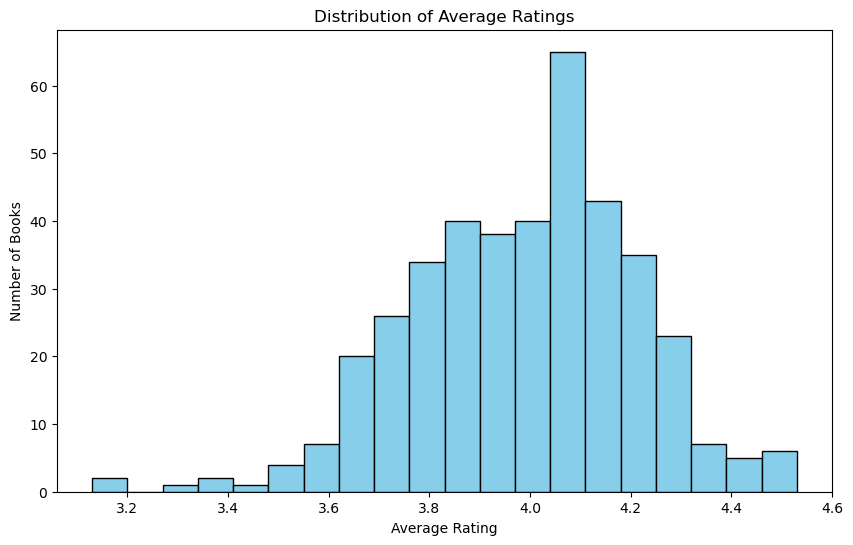

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(books_df['average_rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.title('Distribution of Average Ratings')
plt.show()

In [29]:
plt.rcParams['figure.figsize'] = (12, 8)

## Heatmap showing the correlation between numerical variables.


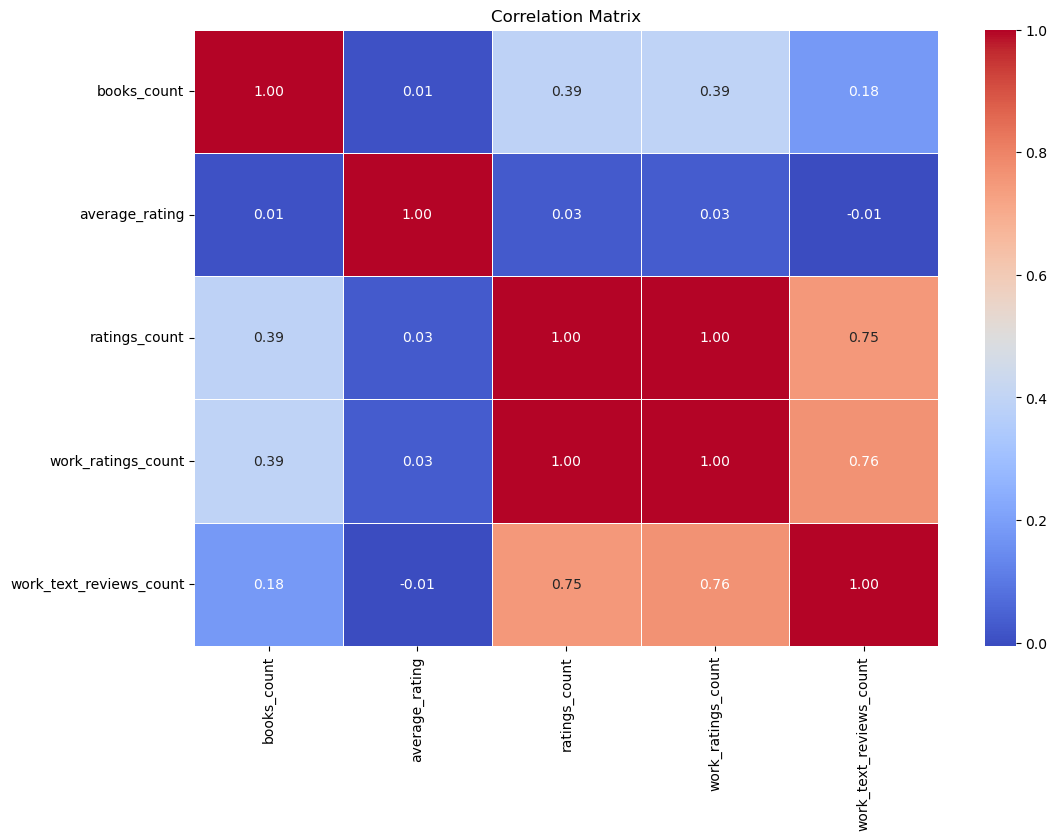

In [30]:
correlation_matrix = books_df[['books_count', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Box plot to visualize the distribution of average ratings.


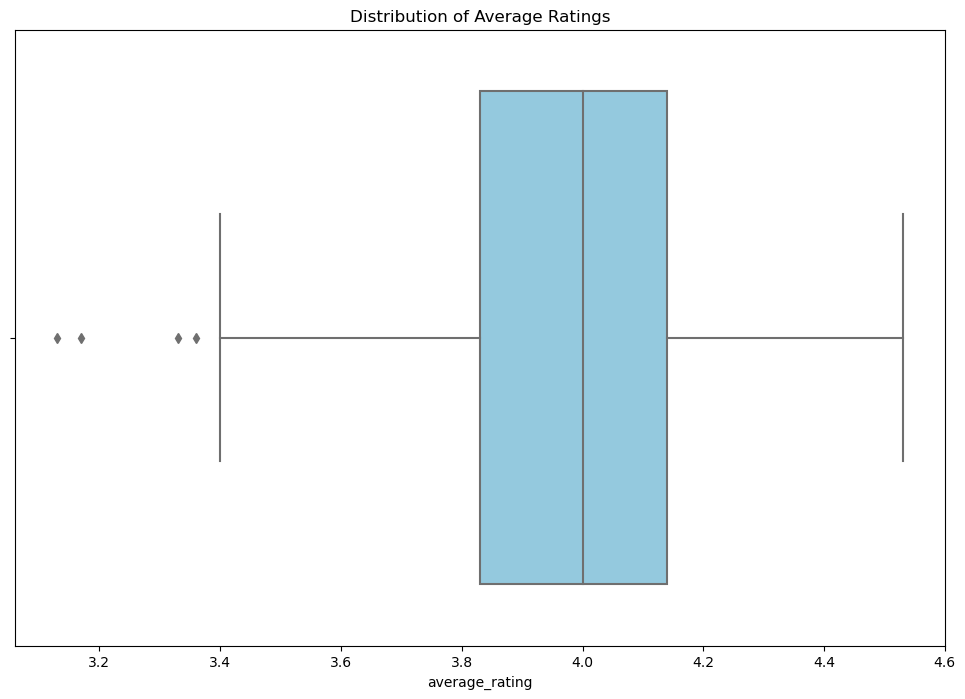

In [31]:
sns.boxplot(x='average_rating', data=books_df, color='skyblue')
plt.title('Distribution of Average Ratings')
plt.show()

## Bar chart showing the top 10 authors with the most books.


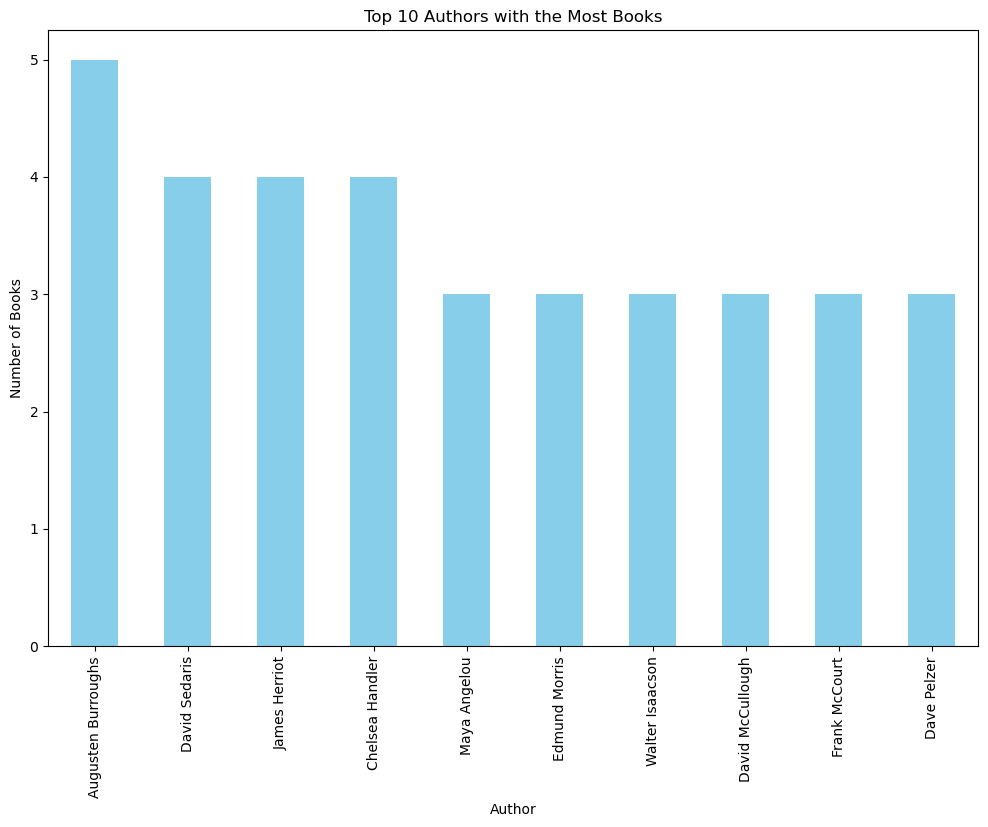

In [36]:
top_authors = books_df['authors'].value_counts().head(10)
top_authors.plot(kind='bar', color='skyblue')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Top 10 Authors with the Most Books')
plt.show()

## Scatter plot to visualize the relationship between ratings count and average rating.


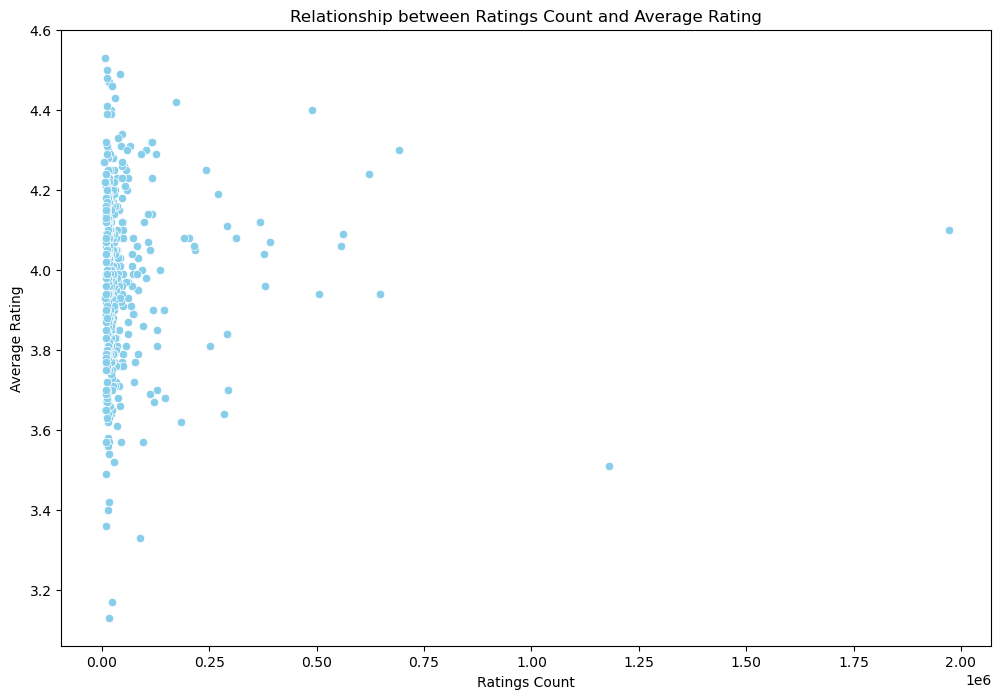

In [37]:
sns.scatterplot(x='ratings_count', y='average_rating', data=books_df, color='skyblue')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')
plt.title('Relationship between Ratings Count and Average Rating')
plt.show()

## Bar chart showing the number of books in each publication year.


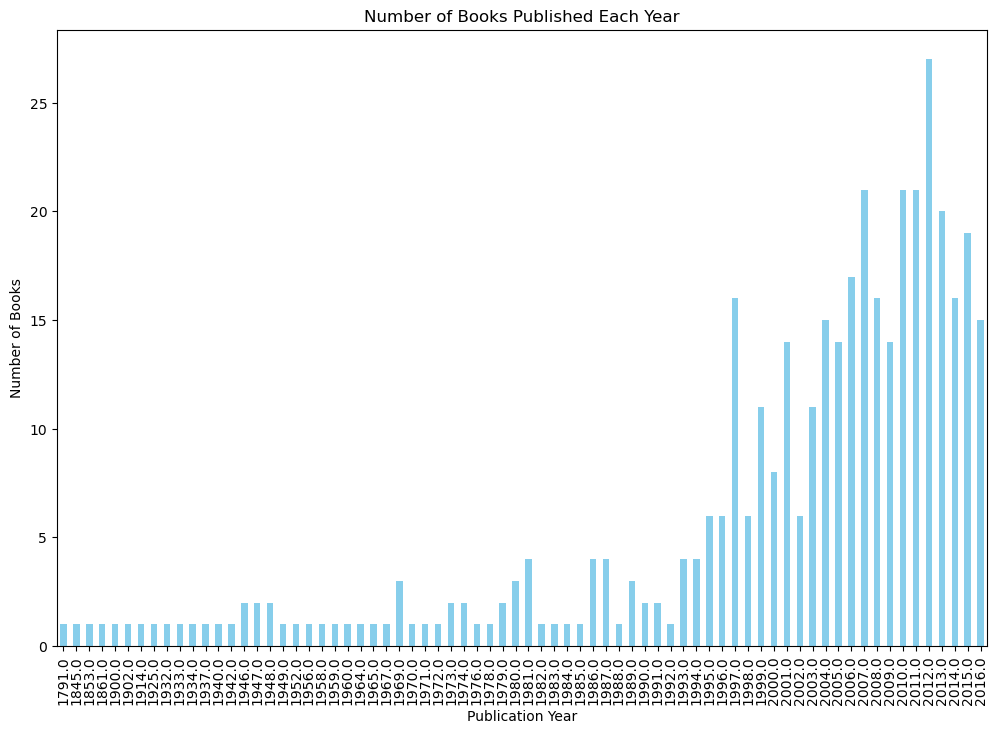

In [38]:
publication_year_counts = books_df['original_publication_year'].value_counts().sort_index()
publication_year_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books')
plt.title('Number of Books Published Each Year')
plt.show()


#

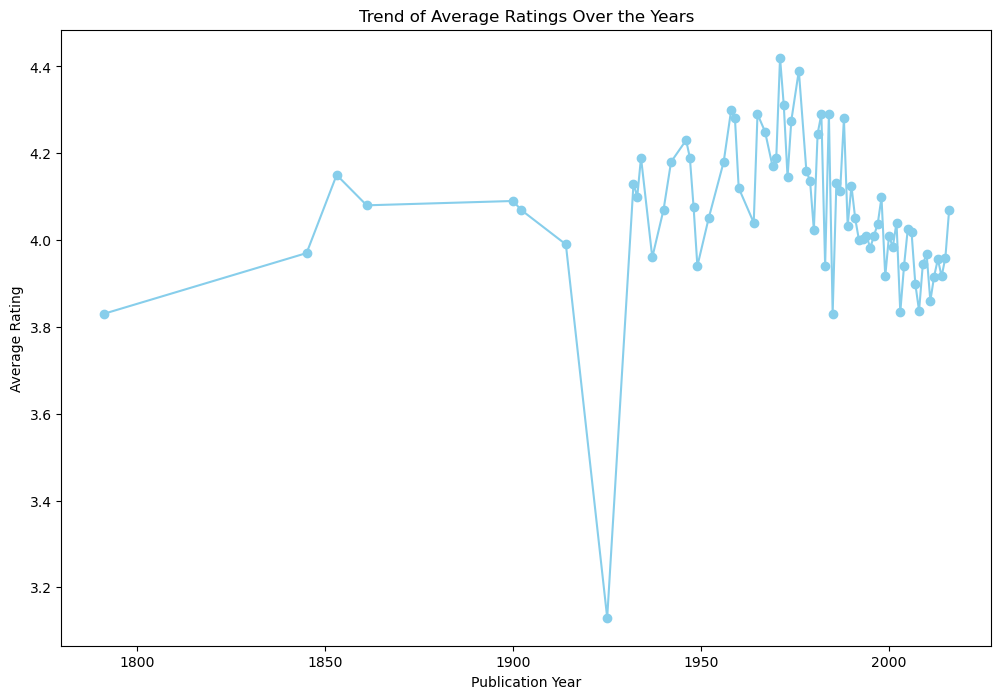

In [39]:
average_rating_by_year = books_df.groupby('original_publication_year')['average_rating'].mean()
average_rating_by_year.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.title('Trend of Average Ratings Over the Years')
plt.show()